In [1]:
import sys
sys.path.append('../')
sys.path.append('../get_branch/linear')
sys.path.append('../model_json/make_json_program/linear/test')

import json
import numpy as np
import matplotlib.pyplot as plt

import make_mlp_test_json
import linear_input_branch
import linear_hidden_branch
import linear_output_branch

In [2]:
!pwd

/Users/info/Desktop/lab/program/plot_branch_node/forward/plot


In [3]:
make_mlp_test_json.make_json()

In [4]:
json_file = open('../model_json/json/mlp_test.json', 'r')
json_value  = json.load(json_file)
json_value

{'layer0': {'input_features': 4,
  'out_features': 2,
  'layer_type': 'input',
  'processing_type': 'linear'},
 'layer1': {'input_features': 2,
  'out_features': 3,
  'layer_type': 'output',
  'processing_type': 'linear'}}

In [5]:
#dictからlistを作成（最初からlistを作成したほうが楽だったかも）
branch_list = np.empty(0)

for i in range(len(json_value)):
    layer_json_value = json_value["layer" + str(i)]
    
    if layer_json_value["layer_type"] == "input":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_input_branch.get_branch(layer_json_value))
        
    if layer_json_value["layer_type"] == "hidden":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_hidden_branch.get_branch(layer_json_value))

    if layer_json_value["layer_type"] == "output":
        break
branch_list

array([2., 2., 2., 2.])

(array([0., 0., 0., 0., 0., 4., 0., 0., 0., 0.]),
 array([1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5]),
 <a list of 10 Patch objects>)

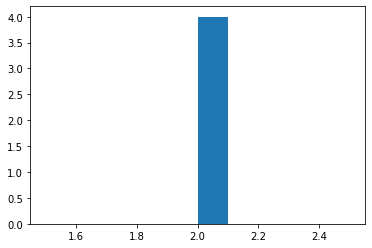

In [7]:
plt.hist(branch_list)